In [2]:
from aeon.datasets._data_loaders import load_from_tsfile
import matplotlib.pyplot as plt
import numpy as np

# Epilepsy 2 Dataset

In [24]:
X_train_f, y_train_f = load_from_tsfile("datasets/Epilepsy2_TRAIN.ts", return_meta_data=False, return_type="numpy2D")
print(X_train_f.shape)
print(y_train_f.shape)
X_test_f, y_test_f = load_from_tsfile("datasets/Epilepsy2_TEST.ts", return_meta_data=False, return_type="numpy2D")
print(X_test_f.shape)
print(y_test_f.shape)
y_train_f = y_train_f.astype(int)
y_test_f = y_test_f.astype(int)

(80, 178)
(80,)
(11420, 178)
(11420,)


Visualise some instances

In [31]:
c0_idxs = np.argwhere(y_train_f == 0).flatten()
c1_idxs = np.argwhere(y_train_f == 1).flatten()

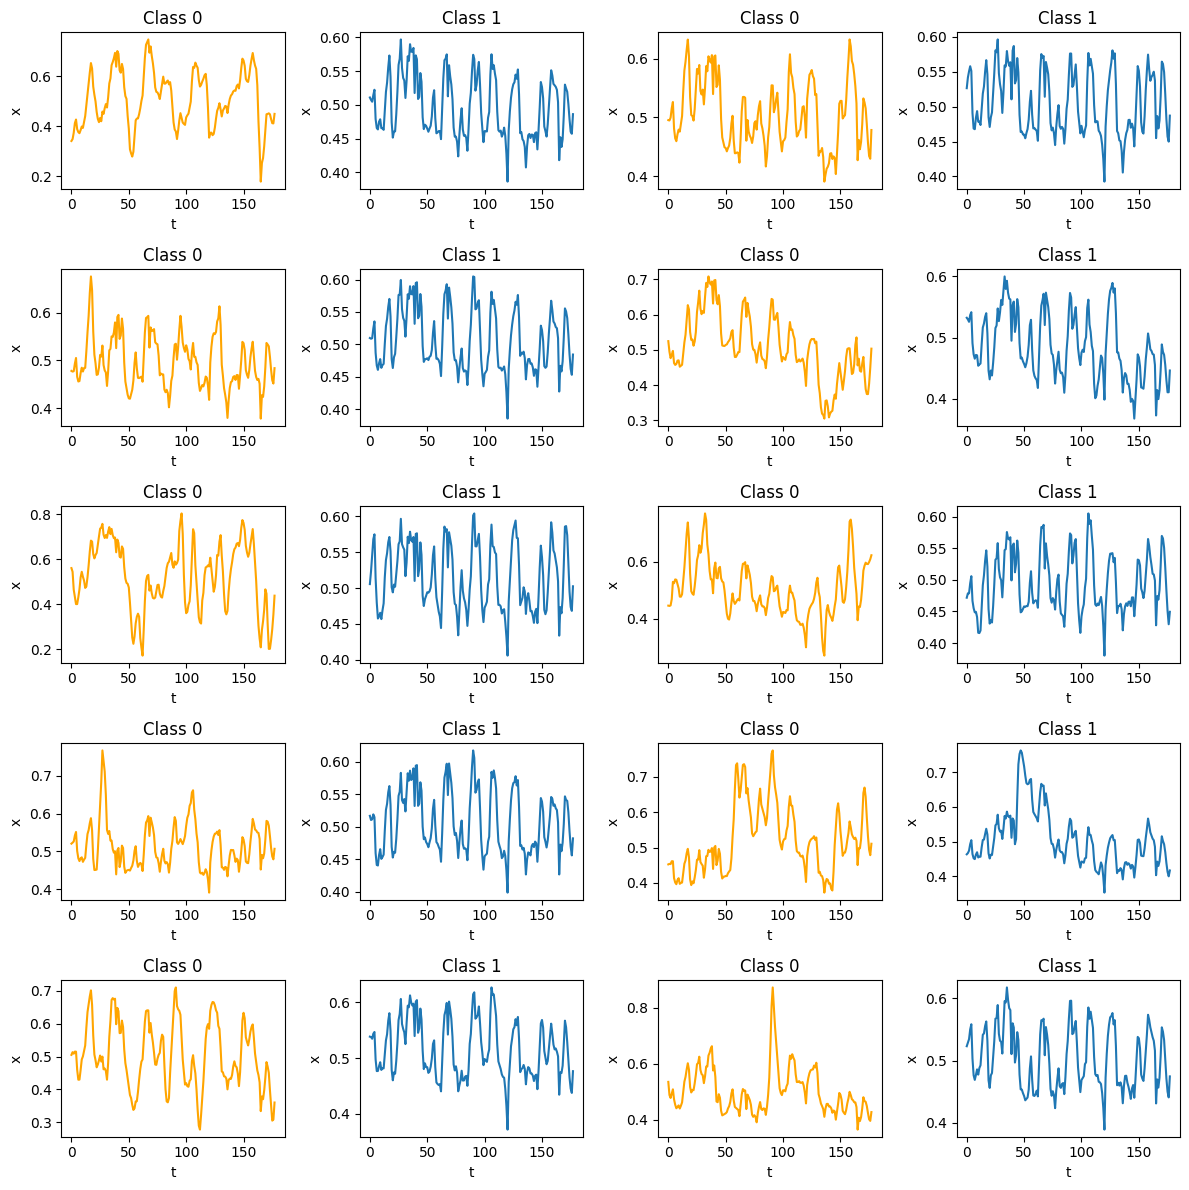

In [39]:
fig, axes = plt.subplots(5, 4, figsize=(12,12))
for (i, ax) in enumerate(axes.ravel()):
    if i % 2 == 0:
        ax.plot(X_train_f[c0_idxs[i], :],c ="orange")
        ax.set_title(f"Class 0")
        ax.set_xlabel("t")
        ax.set_ylabel("x")
    else:
        ax.plot(X_train_f[c1_idxs[i], :])
        ax.set_title(f"Class 1")
        ax.set_xlabel("t")
        ax.set_ylabel("x")
fig.tight_layout()

In [53]:
# append ys to first column of train/test
train = np.column_stack([y_train_f, X_train_f])
test = np.column_stack([y_test_f, X_test_f])

In [57]:
np.savetxt("datasets/Epilepsy2_TRAIN.txt", train)
np.savetxt("datasets/Epilepsy2_TEST.txt", test)

---

# Julia

In [24]:
import Pkg
Pkg.activate("../../.")

  Activating project at `~/Desktop/QuantumInspiredML`


In [33]:
using DelimitedFiles
using Plots
using JLD2

In [36]:
JLD2.jldopen

jldopen (generic function with 5 methods)

In [30]:
train_f = readdlm("datasets/Epilepsy2_TRAIN.txt");
test_f = readdlm("datasets/Epilepsy2_TEST.txt");
X_train = train_f[:, 2:end]
y_train = Int.(train_f[:, 1])
X_test = test_f[:, 2:end]
y_test = Int.(test_f[:, 1]);

In [39]:
JLD2.jldopen("Epilepsy2.jdl2", "w") do f
    f["X_train"] = X_train
    f["X_test"] = X_test
    f["y_train"] = y_train
    f["y_test"] = y_test
end;